# Optimization project: K-Menas Clustering

__Given that we don't have the proper datafiles to run the code, we will use synthetic ones to still do the work, and
as soon as we have the real files we will just substitute them.__

In [1]:
import numpy as np
from numpy import random
import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score 

#Simulate dataframe
X1 = np.random.uniform(low=0, high=25, size=(200,))
X2 = np.random.uniform(low=5, high=30, size=(200))
df = pd.DataFrame({'i': X1, 'j': X2}, columns=['i', 'j'])

In [2]:
df

,i,j
0,13.199053,7.809211
1,11.282838,13.276475
2,13.739766,25.122450
3,10.584652,25.212749
4,10.091888,9.797708
...,...,...
195,17.169673,10.040313
196,6.630807,5.031020
197,12.350613,13.851938
198,19.405975,25.863469


## K-means Clustering:


In [5]:
# Randomly assign indeces of cluster centroids:
def initiate_centroids(n, df):
    centroids = []
    random.seed(42) # use this since we want to compare the different number of clusters
    
    #generate random centroid indeces
    initial_index_centroid = random.sample(range(0, len(df)), n)
    
    #find the data points corresponding the the indeces:
    for i in initial_index_centroid:
        centroids.append(df.loc[i])
    return centroids


# To calculate the distance between two points:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5


# To find the closest centroid to each data point:
def findClosestCentroids(centroids, df):
    assigned_centroid = []
    
    #iterate over every data point in the dataframe:
    for index, row in df.iterrows():
        distance=[]
        
        #find distance of data point with each cluster:
        for center in centroids:
            distance.append(calc_distance(row, center))
            
        #assign data point to closest cluster:
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid


#To update the centroid of the clusters:
def calc_centroids(clusters, df):
    
    #initiate empty list for new centroids of each cluster:
    new_centroids = []
    
    #df including each point and its respective cluster
    new_df = pd.concat([pd.DataFrame(df), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    
    #iterate over the distinct clusters
    for c in set(new_df['cluster']):
        
        #take out the data points corresponding to each cluster:
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        
        #find the new cluster centroid which is the mean of the clusters we already assigned
        cluster_mean = current_cluster.mean(axis=0)
        
        #append the new centroid
        new_centroids.append(cluster_mean)
        
    return new_centroids


#Recursively find and update cluster centroids:
#n: number of clusters, df: dataframe of data points, iterations: number of iterations
def recursive_centroid_find(n, df, iterations):
    #initiate centroids:
    centroids = initiate_centroids(n, df)
    
    # Recursively call the functions again to update the mean of the clusters:
    for i in range(iterations):
        get_centroids = findClosestCentroids(centroids, df)
        centroids = calc_centroids(get_centroids, df)
        print(pd.DataFrame(centroids))
        
        #plot the centroids after every iteration:
        plt.figure()
        plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='red')
        plt.scatter(df.i, df.j, alpha=0.1)
        plt.show()
    return pd.DataFrame(centroids)


           i          j
0  16.163792  14.103429
1   4.275206  17.622504
2  18.409186  26.219236


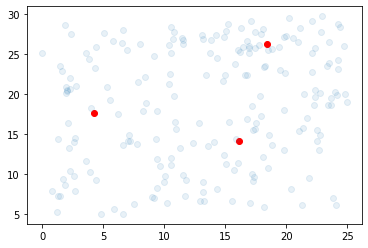

           i          j
0  16.070883  12.023011
1   4.649307  17.609380
2  18.339868  25.262783


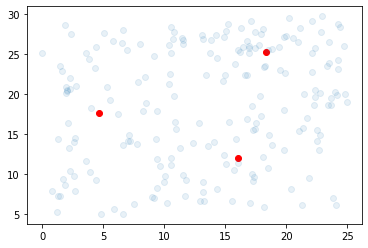

           i          j
0  15.476132  11.302015
1   4.699223  17.999202
2  18.521385  24.933701


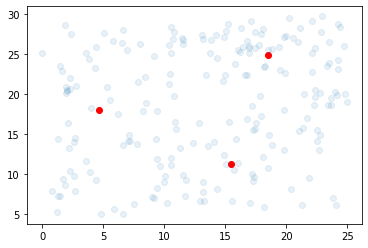

           i          j
0  15.206043  10.976130
1   4.697601  18.218509
2  18.521054  24.765341


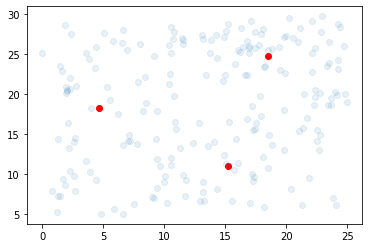

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


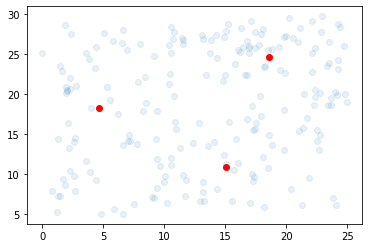

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


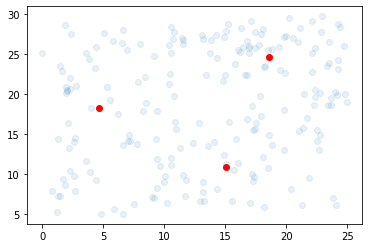

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


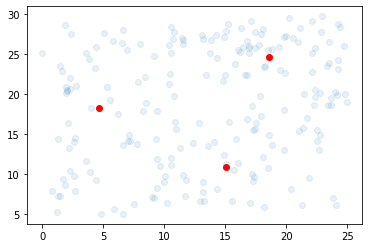

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


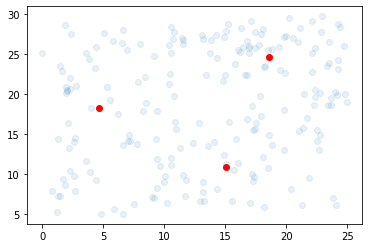

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


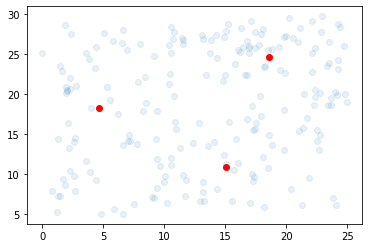

           i          j
0  15.099620  10.876546
1   4.697601  18.218509
2  18.560765  24.668909


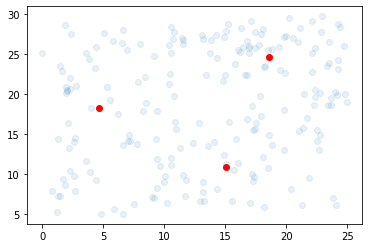

,i,j
0,15.099620,10.876546
1,4.697601,18.218509
2,18.560765,24.668909


In [6]:
recursive_centroid_find(3, df, 10)

In [109]:
x=[]
y=[]
for n in range(2, 199, 15):
    x.append(n)
    get_centroids = findClosestCentroids(initiate_centroids(n, df), df)
    y.append(davies_bouldin_score(df, get_centroids))

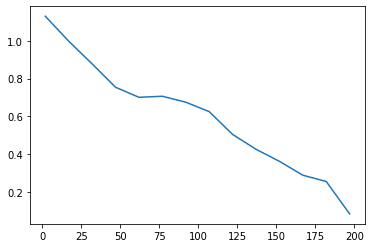

In [111]:
plt.plot(x,y)

For this data, makes no sense because there is no cluster, we just generated random uniformly distributed points, so the more clusters we have the better the score.

want to optimize bouldin(K) such that K > 1, K < N-1